# Causality

`pip3 install -r requirements.txt (--user, если не используете виртуальное окружение)`

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

## Связь в линейной регрессии

### Fork

Смоделируем зависимости,соответствующие типу Fork. Заметим, что здесь есть только одна переменная, которая является экзогенной (Z), то есть она не зависит ни от какой другой переменной в системе (не зависит от X, Y, эндогенных переменных).
```
Z->X, Z->Y, X->Y
```

![title](fork.png)

In [3]:
rs = np.random.RandomState(42)
N = 10000
Z = rs.randn(10000)
X = 0.5 * Z + rs.randn(10000) 
Y = 0.3 * Z + 0.4 * X + rs.randn(10000)

Построим две регрессии Y ~ X, Y ~ Z + X. Что можно сказать о 95% доверительном интервале (confint) на коэффициент регрессии перед X в двух этих моделях?

In [4]:
from statsmodels.regression.linear_model import OLS
l1 = OLS(Y, np.vstack([X, Z]).T).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.318
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              2331.
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        18:12:46   Log-Likelihood:                         -14096.
No. Observations:               10000   AIC:                                  2.820e+04
Df Residuals:                    9998   BIC:                                  2.821e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4266      0.010     43.099      0.000       0.407       0.446
x2             0.3134      0.011     28.467      0.000       0.292       0.335
==============================================================================
Omnibus:                        3.320   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                3.163
Skew:                           0.007   Prob(JB):                        0.206
Kurtosis:                       2.914   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
from statsmodels.regression.linear_model import OLS
l1 = OLS(Y, np.vstack([X]).T).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.263
Method:                 Least Squares   F-statistic:                              3564.
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        18:12:46   Log-Likelihood:                         -14486.
No. Observations:               10000   AIC:                                  2.897e+04
Df Residuals:                    9999   BIC:                                  2.898e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5511      0.009     59.699      0.000       0.533       0.569
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.051
Skew:                          -0.004   Prob(JB):                        0.975
Kurtosis:                       3.007   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Collider

Рассмотрим collider:
```
X -> Z
X -> Y
Y -> Z
```

![title](collider.png)

In [6]:
X = rs.randn(N)
Y = 0.7 * X + rs.randn(N)
Z = 1.2 * X + 0.6 * Y + rs.randn(N)

In [7]:
from statsmodels.regression.linear_model import OLS
l1 = OLS(Y, np.vstack([X, Z]).T).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              5084.
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        18:14:20   Log-Likelihood:                         -12730.
No. Observations:               10000   AIC:                                  2.546e+04
Df Residuals:                    9998   BIC:                                  2.548e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0107      0.015      0.725      0.468      -0.018       0.040
x2             0.4311      0.007     58.298      0.000       0.417       0.446
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.269
Skew:                          -0.012   Prob(JB):                        0.874
Kurtosis:                       3.010   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from statsmodels.regression.linear_model import OLS
l1 = OLS(Y, np.vstack([X]).T).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.336
Model:                            OLS   Adj. R-squared (uncentered):              0.336
Method:                 Least Squares   F-statistic:                              5053.
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        18:15:08   Log-Likelihood:                         -14193.
No. Observations:               10000   AIC:                                  2.839e+04
Df Residuals:                    9999   BIC:                                  2.839e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7079      0.010     71.083      0.000       0.688       0.727
==============================================================================
Omnibus:                        3.522   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.548
Skew:                          -0.045   Prob(JB):                        0.170
Kurtosis:                       2.978   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from statsmodels.regression.linear_model import OLS
l1 = OLS(Y, np.vstack([Z]).T).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                          1.017e+04
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        18:15:40   Log-Likelihood:                         -12730.
No. Observations:               10000   AIC:                                  2.546e+04
Df Residuals:                    9999   BIC:                                  2.547e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4355      0.004    100.838      0.000       0.427       0.444
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.256
Skew:                          -0.011   Prob(JB):                        0.880
Kurtosis:                       3.010   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## DAGs (Directed Acyclic Graphs)

In [10]:
from causalgraphicalmodels import CausalGraphicalModel

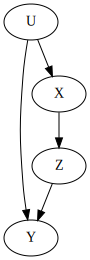

In [11]:
G = CausalGraphicalModel(nodes=['U', 'Z', 'X', 'Y'], edges=[
    ('U', 'Y'),
    ('U', 'X'),
    ('X', 'Z'),
    ('Z', 'Y')
])
G.draw()

Пути из U в Y

In [12]:
list(nx.all_simple_paths(G.dag, 'U', 'Y'))

[['U', 'Y'], ['U', 'X', 'Z', 'Y']]

In [13]:
list(nx.all_simple_paths(G.dag.to_undirected(), 'U', 'Y'))

[['U', 'Y'], ['U', 'X', 'Z', 'Y']]

In [14]:
list(nx.all_simple_paths(G.dag.to_undirected(), 'X', 'Y'))

[['X', 'U', 'Y'], ['X', 'Z', 'Y']]

In [15]:
G.get_all_independence_relationships()

[('Y', 'X', {'U', 'Z'}), ('Z', 'U', {'X'})]

In [16]:
G.get_distribution()

'P(U)P(X|U)P(Z|X)P(Y|U,Z)'

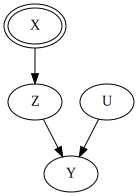

In [17]:
G.do('X').draw()

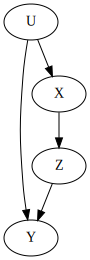

In [18]:
G.draw()

In [19]:
G.get_all_backdoor_adjustment_sets('X','Y')

frozenset({frozenset({'U'})})

In [20]:
G.get_all_frontdoor_adjustment_sets('X','Y')

frozenset({frozenset({'Z'})})

In [21]:
G.get_all_frontdoor_adjustment_sets('Y','X')

frozenset({frozenset()})

## Inductive search

Допустим, у нас есть несколько событий:

1. Продажа мороженного (ICE)
2. Количество преступлений (CRIMES)
3. Количество полицейских на тысячу человек (POLICE)
4. Средняя температура (TEMP)
5. Количество скачиваний браузера IE (IE)
6. Количество зараженных компьютеров (COMP)
7. Уровень загрязнения воздуха (AIR)

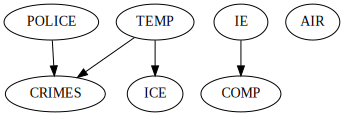

In [22]:
G = CausalGraphicalModel(nodes=['ICE','CRIMES','POLICE', 'TEMP','IE','COMP', 'AIR'], 
edges=[('TEMP','ICE'),  ('TEMP','CRIMES'), ('IE','COMP'), ('POLICE', 'CRIMES')])
G.draw()

In [23]:
from causality.inference.search import IC
from causality.inference.independence_tests import MutualInformationTest
import pandas as pd
import seaborn as sns

In [24]:
police = rs.uniform(low=1, high=100, size=1000)
temp = rs.uniform(low=-40, high=40, size=1000)
air = rs.uniform(size=1000)
crimes = (temp + 40) / police
ice = temp + 40
ie = rs.uniform(size=1000)
comp = ie**2
dataframe = pd.DataFrame({'police':police, 'temp':temp, 'air':air, 'crimes':crimes, 'ice':ice, 'ie':ie, 'comp':comp})

In [28]:
import statsmodels.api as sm

class OLS_test():
    def __init__(self, y, x, z, data, alpha):
        self.regression = sm.OLS.from_formula('{0}~{1}'.format(y[0], '+'.join(x + z)), data)
        self.result = self.regression.fit()
        self.x = x
        self.y = y
        self.z = z
        self.alpha = alpha
        print(y, x, z)
    def independent(self):
        to_fisher = '(' + self.x[0] + '=0)'
        return self.result.f_test(to_fisher).pvalue > self.alpha

In [29]:
variable_types = {'police' : 'd', 
                  'temp' : 'd',
                  'air' : 'c',
                  'ice' : 'd',
                  'crimes' : 'd',
                  'ie':'c',
                  'comp':'c'}

ic_algorithm = IC(OLS_test, alpha=0.05)
graph = ic_algorithm.search(dataframe, variable_types)

['temp'] ['police'] []
['air'] ['police'] []
['ice'] ['police'] []
['crimes'] ['police'] []
['ie'] ['police'] []
['comp'] ['police'] []
['air'] ['temp'] []
['ice'] ['temp'] []
['crimes'] ['temp'] []
['ie'] ['temp'] []
['comp'] ['temp'] []
['ice'] ['air'] []
['crimes'] ['air'] []
['ie'] ['air'] []
['comp'] ['air'] []
['crimes'] ['ice'] []
['ie'] ['ice'] []
['comp'] ['ice'] []
['ie'] ['crimes'] []
['comp'] ['crimes'] []
['comp'] ['ie'] []
['crimes'] ['police'] ['ice']
['crimes'] ['police'] ['temp']
['ice'] ['temp'] ['crimes']
['crimes'] ['temp'] ['ice']
['crimes'] ['ice'] ['police']
['crimes'] ['ice'] ['temp']
['crimes'] ['ice'] ['police', 'temp']


/home/twlvth/.pyenv/versions/venv3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


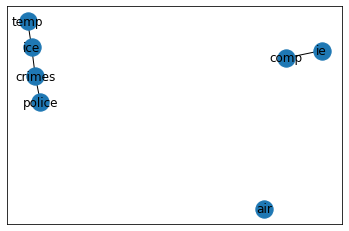

In [30]:
nx.draw_networkx(graph)

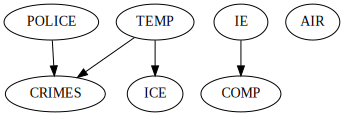

In [31]:
G = CausalGraphicalModel(nodes=['ICE','CRIMES','POLICE', 'TEMP','IE','COMP', 'AIR'], 
edges=[('TEMP','ICE'),  ('TEMP','CRIMES'), ('IE','COMP'), ('POLICE', 'CRIMES')])
G.draw()

In [32]:
for e in graph.edges(data=True):
    print(e)

('police', 'crimes', {'marked': False, 'arrows': ['crimes']})
('temp', 'ice', {'marked': False, 'arrows': []})
('ice', 'crimes', {'marked': False, 'arrows': ['crimes']})
('ie', 'comp', {'marked': False, 'arrows': []})


## Задача про курение

In [34]:
smoke = []
cancer = []
tar = []

smoke += [1] * 323
cancer += [0]*323
tar+=[1]*323

smoke+=[0]
cancer+=[0]
tar+=[1]

smoke+=[1]*57
cancer+=[1]*57
tar+=[1]*57

smoke+=[0]*19
cancer+=[1]*19
tar+=[1]*19


smoke+=[1]*18
cancer+=[0]*18
tar+=[0]*18

smoke+=[0]*38
cancer+=[0]*38
tar+=[0]*38

smoke+=[1]*2
cancer+=[1]*2
tar+=[0]*2

smoke+=[0]*342
cancer+=[1]*342
tar+=[0]*342

dataframe = pd.DataFrame({'smoke':smoke, 'tar':tar, 'cancer':cancer})
dataframe.sample(5)

,smoke,tar,cancer
305,1,1,0
638,0,0,1
719,0,0,1
365,1,1,1
459,0,0,1


### Строим граф

In [35]:
g = nx.DiGraph()

In [36]:
g.add_nodes_from(['smoke','cancer','tar'])
g.add_edges_from([('tar','cancer'),('smoke','tar')])

/home/twlvth/.pyenv/versions/venv3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/twlvth/.pyenv/versions/venv3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


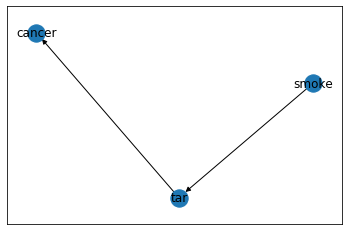

In [37]:
nx.draw_networkx(g)

### Иследуем причинность

In [38]:
from causality.estimation.adjustments import AdjustForDirectCauses
from causality.estimation.nonparametric import CausalEffect
adjustment = AdjustForDirectCauses()
admissable_set = adjustment.admissable_set(g, ['tar'], ['cancer'])
admissable_set

{'smoke'}

In [39]:
dataframe.columns

Index(['smoke', 'tar', 'cancer'], dtype='object')

In [40]:
effect = CausalEffect(dataframe.sample(299), 
                      ['smoke'], ['cancer'], 
                      variable_types={'smoke': 'u', 'cancer': 'u', 'tar': 'u'},
                      admissable_set=[])

In [41]:
smoke = pd.DataFrame({'smoke': [1], 'cancer': [1]})
nsmoke = pd.DataFrame({'smoke': [0], 'cancer': [1]})

In [42]:
effect.pdf(smoke) - effect.pdf(nsmoke)

-0.5949985668534259

In [43]:
effect.pdf(smoke)

array(0.25044395)

In [44]:
effect.pdf(nsmoke)

array(0.84544252)